In [1]:
import numpy as np
import math

#L=4 as "My name is Apoorva" 4 words
#size of each of these vectors for illustrative purposes is taken as 8
L,d_k,d_v=4,8,8
#query vector,key vector and value vector are randomly initialized
#randn--->normal distribution
q=np.random.randn(L,d_k)
k=np.random.randn(L,d_k)
v=np.random.randn(L,d_v)

In [2]:
print("Q/n",q)
print("K/n",k)
print("V/n",v)

Q/n [[ 0.13170126  1.94724511 -1.22450008  0.07715476 -1.79402582  2.09712157
   0.58521936  2.10090556]
 [ 1.2972034   0.05954144 -0.36887032  0.00318771  0.35949539  0.17238967
  -1.44962955 -0.77766639]
 [ 1.20400566  0.80456904 -0.05767353 -0.21852511 -0.19331417  0.34408903
  -1.58029705 -1.4017006 ]
 [ 2.42584287  1.38840387  2.2410846   0.72642655  0.19375642  0.13646935
   2.18048877  0.77856618]]
K/n [[ 0.36190976 -0.02064659  0.42856183 -0.49385496 -0.67137854  1.04169161
  -0.41031188 -1.15071163]
 [-0.75837154 -0.13524338  1.58539813 -0.67682699  0.27010774  0.51299511
  -0.18803073  0.14085206]
 [-0.09816828  0.82018955  0.93675267  0.58907067  1.14082704  0.89505198
  -1.42713446  0.96777451]
 [-1.5717956  -1.47949369 -2.24370075  0.21431401  0.7572315   1.62660226
  -2.12622926  1.28151265]]
V/n [[ 1.06032958 -1.15515802 -0.80307304  1.13702237 -0.03850091 -1.60912673
  -0.1400842  -0.14909774]
 [-0.35749151  0.59684429  1.66067805 -0.59710788 -0.0912417   0.33659124
   

For each word is the sentence "My name is Apoorva"
each word has 8*1 values for each vector q,k,v


#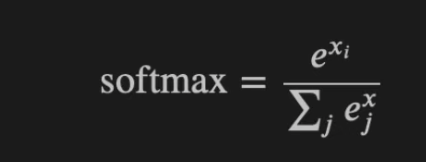Self Attention:

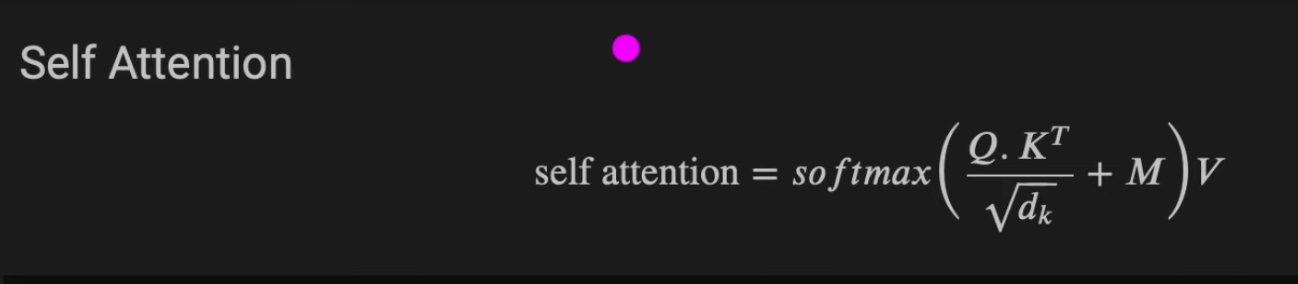

In [3]:
#Numerator
# for every word product of what I am looking for(Q)* what I have to offer(K)==>leads to a 4*4 matrix as we have 4 words in our sentence "My name is Apoorva"
np.matmul(q,k.T)

array([[  0.17594819,  -1.57966055,   1.51095288,   3.17671914],
       [  1.73647262,  -1.23020204,   1.45845892,   1.33957411],
       [  3.25192232,  -0.74141575,   1.34515718,  -1.02314727],
       [ -0.32754615,   0.85589058,   1.41268767, -14.00948053]])

 we can see from the above vector that the most attention is given to the vector "name"

In [4]:
#why do we need the denominator in the above equation i.e sqrt of some dimension q and K----> To minimize the variance and stabilize the product of Q.K transpose vector
q.var(),k.var(),np.matmul(q,k.T).var()

(1.3524186199066812, 1.0514965801574427, 14.749688120297998)

#We can see from above that the variance of query and key vector are close to 1 where as the variance of matreix multiplication of the query and key vector is >1
variance of Query vector----->0.9872293429332755 <1

Key vector------->0.834453373663007 <1

product vector--->11.540399230109658 >>1

#Hence stabilizing it is very important

In [5]:
scaled=np.matmul(q,k.T)/math.sqrt(d_k)
q.var(),k.var(),scaled.var()

(1.3524186199066812, 1.0514965801574427, 1.8437110150372493)

In [6]:
scaled

array([[ 0.06220708, -0.55849434,  0.53420251,  1.12313982],
       [ 0.61393578, -0.4349421 ,  0.5156431 ,  0.47361097],
       [ 1.14972816, -0.26213005,  0.47558488, -0.36173719],
       [-0.11580505,  0.30260302,  0.49946052, -4.95309934]])

#Masking
This is to ensure words don't get context from words generated in the future

Not required in Encoders but required in decoders

In [7]:
#creating a Triangular Matrix
#All of the values below the diagnol is 1 and all values above diagonal is 0
mask=np.tril(np.ones((L,L)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])


#Explaination:

array([[1., 0., 0., 0.],#my can only look at itself and not the words which aren't predicted
       
       [1., 1., 0., 0.],name can look at my name and not the future words
       
       [1., 1., 1., 0.],is can look at my name is and not the future words
       
       [1., 1., 1., 1.]])Apoorva can look at my name is Apoorva and not the future words

In [8]:
#Transform it such that every 1 is 0 and every 0 is negative infinity
#because when we apply the mask the lower diagnol values are simillar to the values in upper diagnol to avoid getting any context from it
mask[mask==0]=-np.infty
mask[mask==1]=0


In [9]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [11]:
scaled+mask

array([[ 0.06220708,        -inf,        -inf,        -inf],
       [ 0.61393578, -0.4349421 ,        -inf,        -inf],
       [ 1.14972816, -0.26213005,  0.47558488,        -inf],
       [-0.11580505,  0.30260302,  0.49946052, -4.95309934]])

#Softmax

is used to convert a vector into a probability distribution

In [15]:
def softmax(x):
  return (np.exp(x).T/np.sum(np.exp(x),axis=-1)).T

In [16]:
attention=softmax(scaled+mask)

In [17]:
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.74055936, 0.25944064, 0.        , 0.        ],
       [0.57035863, 0.13899071, 0.29065066, 0.        ],
       [0.22843479, 0.34711594, 0.42263814, 0.00181114]])

[[1.        , 0.        , 0.        , 0.        ], my can only focus on my (see the vector value its more for first element)

[0.74055936, 0.25944064, 0.        , 0.        ],name can focus on my name
       
[0.57035863, 0.13899071, 0.29065066, 0.        ],is can focus on my name is
       
[0.22843479, 0.34711594, 0.42263814, 0.00181114]Apoorva can focus on my name is Apoorva

In [21]:
#we multiply the attention matrix and the value matrix
#better encapsulates the concept of the word =new_v
new_v=np.matmul(attention,v)
new_v

array([[ 1.06032958, -1.15515802, -0.80307304,  1.13702237, -0.03850091,
        -1.60912673, -0.1400842 , -0.14909774],
       [ 0.69248918, -0.70061742, -0.16387589,  0.68711851, -0.05218401,
        -1.10432842,  0.09496649, -0.33173846],
       [ 0.62983892, -0.61597752, -0.53118514,  0.46658847, -0.16048538,
        -0.87736701,  0.34898287, -0.31042745],
       [ 0.22777564, -0.11294784, -0.05051656, -0.0902595 , -0.22345015,
        -0.26128608,  0.70347554, -0.4861325 ]])

In [22]:
v

array([[ 1.06032958, -1.15515802, -0.80307304,  1.13702237, -0.03850091,
        -1.60912673, -0.1400842 , -0.14909774],
       [-0.35749151,  0.59684429,  1.66067805, -0.59710788, -0.0912417 ,
         0.33659124,  0.76590606, -0.85307659],
       [ 0.25721185, -0.13789403, -1.04580644, -0.34037286, -0.43297443,
        -0.02191893,  1.10932926, -0.36751525],
       [ 0.52063306,  1.12390228, -0.83752846,  0.62129499,  0.00427868,
        -0.70561505,  0.42657826, -0.34836944]])

In [23]:
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
    d_k = q.shape[-1]
    scaled = np.matmul(q, k.T) / math.sqrt(d_k)
    if mask is not None:
        scaled = scaled + mask
    attention = softmax(scaled)
    out = np.matmul(attention, v)
    return out, attention


In [24]:
values, attention = scaled_dot_product_attention(q, k, v, mask=None)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)


Q
 [[ 0.13170126  1.94724511 -1.22450008  0.07715476 -1.79402582  2.09712157
   0.58521936  2.10090556]
 [ 1.2972034   0.05954144 -0.36887032  0.00318771  0.35949539  0.17238967
  -1.44962955 -0.77766639]
 [ 1.20400566  0.80456904 -0.05767353 -0.21852511 -0.19331417  0.34408903
  -1.58029705 -1.4017006 ]
 [ 2.42584287  1.38840387  2.2410846   0.72642655  0.19375642  0.13646935
   2.18048877  0.77856618]]
K
 [[ 0.36190976 -0.02064659  0.42856183 -0.49385496 -0.67137854  1.04169161
  -0.41031188 -1.15071163]
 [-0.75837154 -0.13524338  1.58539813 -0.67682699  0.27010774  0.51299511
  -0.18803073  0.14085206]
 [-0.09816828  0.82018955  0.93675267  0.58907067  1.14082704  0.89505198
  -1.42713446  0.96777451]
 [-1.5717956  -1.47949369 -2.24370075  0.21431401  0.7572315   1.62660226
  -2.12622926  1.28151265]]
V
 [[ 1.06032958 -1.15515802 -0.80307304  1.13702237 -0.03850091 -1.60912673
  -0.1400842  -0.14909774]
 [-0.35749151  0.59684429  1.66067805 -0.59710788 -0.0912417   0.33659124
   0.7

In [25]:
#passing the value of mask
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[ 0.13170126  1.94724511 -1.22450008  0.07715476 -1.79402582  2.09712157
   0.58521936  2.10090556]
 [ 1.2972034   0.05954144 -0.36887032  0.00318771  0.35949539  0.17238967
  -1.44962955 -0.77766639]
 [ 1.20400566  0.80456904 -0.05767353 -0.21852511 -0.19331417  0.34408903
  -1.58029705 -1.4017006 ]
 [ 2.42584287  1.38840387  2.2410846   0.72642655  0.19375642  0.13646935
   2.18048877  0.77856618]]
K
 [[ 0.36190976 -0.02064659  0.42856183 -0.49385496 -0.67137854  1.04169161
  -0.41031188 -1.15071163]
 [-0.75837154 -0.13524338  1.58539813 -0.67682699  0.27010774  0.51299511
  -0.18803073  0.14085206]
 [-0.09816828  0.82018955  0.93675267  0.58907067  1.14082704  0.89505198
  -1.42713446  0.96777451]
 [-1.5717956  -1.47949369 -2.24370075  0.21431401  0.7572315   1.62660226
  -2.12622926  1.28151265]]
V
 [[ 1.06032958 -1.15515802 -0.80307304  1.13702237 -0.03850091 -1.60912673
  -0.1400842  -0.14909774]
 [-0.35749151  0.59684429  1.66067805 -0.59710788 -0.0912417   0.33659124
   0.7